### **`Q.No-01`    Install and load the latest versions of TensorFlow and Keras. Print their versions.**

**Ans :-**

**Step 1: Install TensorFlow and Keras**

In [1]:
pip install tensorflow keras --upgrade

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   --------------------------- ------------ 0.8/1.1 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 799.2 kB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 799.2 kB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 799.2 kB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 491.7 kB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


**Step 2: Load TensorFlow and Keras, and Print Their Versions**

In [2]:
import tensorflow as tf
import keras

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Print Keras version (Keras is now part of TensorFlow)
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.5.0


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-02`    Load the Wine Quality dataset and explore its dimensions.**

**Ans :-**

**Step 1: Load the Wine Quality dataset**

In [5]:
import pandas as pd

wine_data = pd.read_csv("wine.csv")

# Display the first few rows of the dataset
display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


**Step 2: Explore the dimensions of the dataset**

In [6]:
print("Wine Quality Dataset Dimensions (rows, columns):", wine_data.shape)

Wine Quality Dataset Dimensions (rows, columns): (1599, 12)


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-03`    Check for null values, identify categorical variables, and encode them.**

**Ans :-**

**Step 1: Check for Null Values**

In [7]:
# Step 1: Check for null values
null_values = wine_data.isnull().sum()
print("Null Values in the Dataset:\n", null_values)

Null Values in the Dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Step 2: Identify Categorical Variables**

In [8]:
# Step 2: Identify categorical variables
# Check the data types of the columns
data_types = wine_data.dtypes
print("\nData Types of the Columns:\n", data_types)


Data Types of the Columns:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object


**Step 3: Encode Categorical Variables**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Encode the 'quality' column
wine_data['quality'] = label_encoder.fit_transform(wine_data['quality'])

# Verify the transformation
print("Encoded unique values in 'quality':", wine_data['quality'].unique())

Encoded unique values in 'quality': [0 1]


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-04`    Separate the features and target variables from the dataframe.**

**Ans -**

**Step 1: Identify Features and Target**

In [10]:
target_column = 'quality'

**Step 2: Split Features and Target**

In [11]:
X = wine_data.drop(columns=[target_column])  # Features: all columns except 'quality'
y = wine_data[target_column]  # Target: 'quality'

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-05`    Perform a train-test split and divide the data into training, validation, and test datasets.**

**Ans :-**

**Step 1: Perform a Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Perform a Train-Validation Split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-06`    Scale the dataset using an appropriate scaling technique.**

**Ans :-**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-07`    Design and implement at least two hidden layers and an output layer for the binary categorical variables.**

**Ans :-**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input layer (automatically inferred from input shape) and first hidden layer with 64 neurons, ReLU activation
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))

# Second hidden layer with 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 1 neuron, Sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-08`    Create a Sequential model in Keras and add the previously designed layers to it.**

**Ans :-**

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add the input layer and first hidden layer with 64 neurons, ReLU activation
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))

# Add the second hidden layer with 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 1 neuron, Sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-09`    Print the summary of the model architecture.**

**Ans :-**

In [19]:
# Print the summary of the model architecture
print("Model Summary :-")
model.summary()

Model Summary :-


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-10`     Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.**

**Ans :-**

In [20]:
# Compile the model with loss function, optimizer, and accuracy metric
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-11`     Compile the model with the specified loss function, optimizer, and metrics.**

**Ans :-**

In [21]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-12`    Fit the model to the training data using appropriate batch size and number of epochs.**

**Ans :-**

In [22]:
# Fit the model to the training data
history = model.fit(
    X_train_scaled,  # Training features
    y_train,         # Training labels
    validation_data=(X_val_scaled, y_val),  # Validation data
    epochs=50,       # Number of epochs
    batch_size=32    # Batch size
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5305 - loss: 0.7098 - val_accuracy: 0.6771 - val_loss: 0.6341
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7128 - loss: 0.6060 - val_accuracy: 0.7161 - val_loss: 0.5810
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.5642 - val_accuracy: 0.7292 - val_loss: 0.5483
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7365 - loss: 0.5455 - val_accuracy: 0.7448 - val_loss: 0.5335
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7503 - loss: 0.5147 - val_accuracy: 0.7552 - val_loss: 0.5245
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7491 - loss: 0.5147 - val_accuracy: 0.7656 - val_loss: 0.5219
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7775 - loss: 0.4792 - val_accuracy: 0.7604 - val_loss: 0.5195
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.5096 - val_accuracy: 0.7682 - val_loss:

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-13`    Obtain the model's parameters (weights and biases)..**

**Ans :-**

In [24]:
# Get the model's weights and biases
model_weights = model.get_weights()

# Print the weights and biases for each layer
for idx, layer_weights in enumerate(model_weights):
    print(f"Layer {idx // 2 + 1} {'Weights' if idx % 2 == 0 else 'Biases'}: \n{layer_weights}\n")

Layer 1 Weights: 
[[-0.04386811 -0.04880435 -0.10421313 -0.01215112 -0.29469076 -0.06368366
   0.16003218 -0.22270346  0.01240269 -0.16934611  0.01108549 -0.24499756
  -0.21839972 -0.13123818  0.09802392 -0.02570668  0.20826852 -0.36520788
  -0.24994346 -0.4112427   0.09387064  0.13976663 -0.2809897   0.01723772
   0.103104   -0.1676661  -0.01714022  0.10355674  0.16150959 -0.3817628
   0.09630026  0.2745954  -0.06425626 -0.10488699  0.12080555  0.13361295
   0.4082931  -0.14619718  0.14567626 -0.05976262 -0.19833486  0.16065153
   0.09609903  0.02553794  0.108484   -0.34294006 -0.02427247 -0.03188054
   0.3219279   0.16153918 -0.19011799 -0.1635881   0.01703062 -0.17778894
   0.10857429 -0.16339564  0.18862966 -0.02981098 -0.2118512   0.03489603
  -0.10638831  0.15272008  0.3881989  -0.14521433]
 [-0.04374782  0.27261418  0.3060564   0.33658296  0.228686    0.21339896
  -0.06810739  0.26754358  0.1461288  -0.16164546  0.35896426 -0.11505989
  -0.34022564  0.17262268 -0.27232686  0.032

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-14`    Store the model's training history as a Pandas DataFrame.**

**Ans :-**

In [25]:
import pandas as pd

# Convert the training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Display the first few rows of the DataFrame
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.603352,0.675497,0.677083,0.634104
1,0.726257,0.589542,0.716146,0.581023
2,0.730726,0.546958,0.729167,0.548325
3,0.755307,0.524651,0.744792,0.533457
4,0.754190,0.511018,0.755208,0.524512


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-15`    Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.**

**Ans :-**

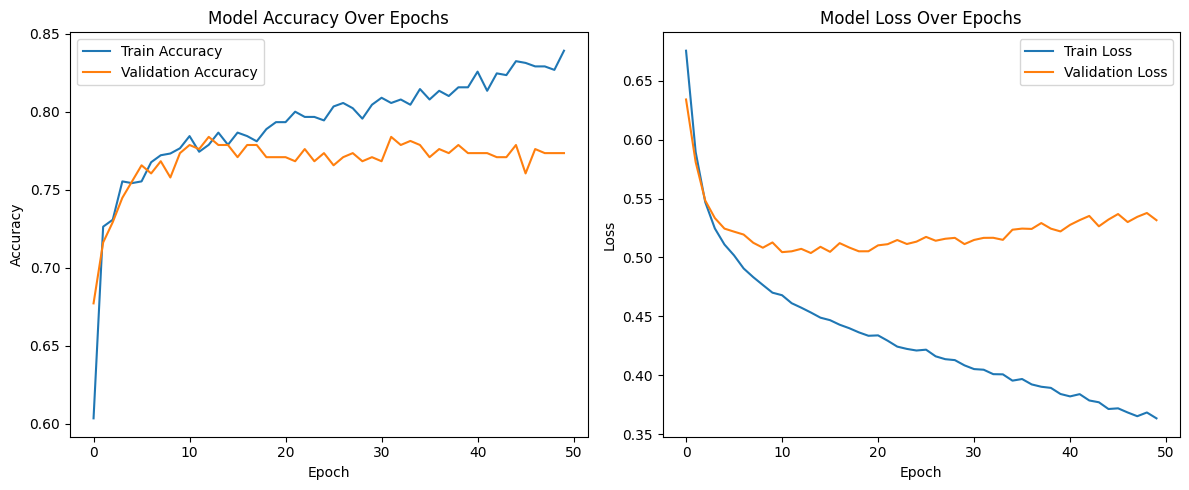

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-16`    Evaluate the model's performance using the test dataset and report relevant metrics.**

**Ans :-**

In [27]:
from sklearn.metrics import classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7577 - loss: 0.4943 
Test Loss: 0.5051182508468628
Test Accuracy: 0.7406250238418579
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
              precision    recall  f1-score   support

         Bad       0.69      0.76      0.72       141
        Good       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320

